In [ ]:
#  I chose response_binary as my target .
# It is a binary classification problem as it has only 2 classes.
# Due to imbalanced classes I choose ROC_AUC ,precision & recall as my eveluation metric
#  I will random split my data for train ,test split

In [2]:
#  imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [77]:
# Read dataset
import pandas as pd
bank = pd.read_csv('../../../Downloads/bank_cleaned.csv')

In [78]:
bank.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')

In [79]:
bank =bank.drop(columns=['default',
       'balance', 'housing', 'loan', 'day', 'month',
       'pdays', 'previous'], axis=1 )

In [6]:
# check the data
bank.head()

,Unnamed: 0,age,job,marital,education,duration,campaign,poutcome,response,response_binary
0,0,58,management,married,tertiary,4.35,1,unknown,no,0
1,1,44,technician,single,secondary,2.52,1,unknown,no,0
2,2,33,entrepreneur,married,secondary,1.27,1,unknown,no,0
3,5,35,management,married,tertiary,2.32,1,unknown,no,0
4,6,28,management,single,tertiary,3.62,1,unknown,no,0


In [7]:
# check shape of the data
bank.shape

(40841, 10)

In [8]:
# 
bank['response'].value_counts()

no     36202
yes     4639
Name: response, dtype: int64

In [9]:
bank['response_binary'].value_counts()


0    36202
1     4639
Name: response_binary, dtype: int64

In [10]:
# check for null values
bank.isnull().sum()

Unnamed: 0         0
age                0
job                0
marital            0
education          0
duration           0
campaign           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [11]:
bank = bank.drop(['response','Unnamed: 0'],axis =1 )

In [12]:
y = bank['response_binary']
y.nunique()


2

In [13]:
# different values of y --- majority class 88%
y.value_counts(normalize=True)

0    0.886413
1    0.113587
Name: response_binary, dtype: float64

In [14]:
# dropping duplicate column to avoid leakage
X = bank.drop('response_binary',axis=1)

In [15]:
X

,age,job,marital,education,duration,campaign,poutcome
0,58,management,married,tertiary,4.35,1,unknown
1,44,technician,single,secondary,2.52,1,unknown
2,33,entrepreneur,married,secondary,1.27,1,unknown
3,35,management,married,tertiary,2.32,1,unknown
4,28,management,single,tertiary,3.62,1,unknown
...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,6.43,2,unknown
40837,51,technician,married,tertiary,16.28,3,unknown
40838,71,retired,divorced,primary,7.60,2,unknown
40839,72,retired,married,secondary,18.78,5,success


In [41]:
X.shape

(40841, 7)

In [16]:
# I have imbalanced classes so accuracy is not the right metric.
# Preicion is worth calculating --as if I predict existing customer will say yes 
# for the term deposit which is my y variable & actually they do sign up for the term deposit then it is good for business.
#  for my case study I want my precision to be high.

In [17]:
X

,age,job,marital,education,duration,campaign,poutcome
0,58,management,married,tertiary,4.35,1,unknown
1,44,technician,single,secondary,2.52,1,unknown
2,33,entrepreneur,married,secondary,1.27,1,unknown
3,35,management,married,tertiary,2.32,1,unknown
4,28,management,single,tertiary,3.62,1,unknown
...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,6.43,2,unknown
40837,51,technician,married,tertiary,16.28,3,unknown
40838,71,retired,divorced,primary,7.60,2,unknown
40839,72,retired,married,secondary,18.78,5,success


In [80]:
# splitting the data into train & test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

#  checking the shape of train,test & val dataset

X_train.shape, X_val.shape,X_test.shape
    

((26137, 7), (6535, 7), (8169, 7))

In [19]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [20]:
#  Baseline model using DummyClassifier

# Precision the accuracy of minority class predictions.
# as Precision, therefore, calculates the accuracy for the minority class.
# Precision evaluates the fraction of correct classified instances among the ones classified as positive
# precision score for the validation dataset

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

# from sklearn.metrics import f1_score


# Using Sklearn DummyClassifier
from sklearn.dummy import DummyClassifier

# Fit the DummyClassifier
baseline = DummyClassifier(strategy='uniform')
baseline.fit(X_train, y_train)

# Make predictions on validation data
y_pred = baseline.predict(X_val)
print(precision_score(y_val, y_pred,average='binary'))
print(recall_score(y_val, y_pred,average='binary'))

# print(f1_score(y_val, y_pred, average='binary'))



0.10920245398773006
0.4883401920438957


In [21]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [22]:
# precision score for the test dataset

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

# from sklearn.metrics import f1_score

# Using Sklearn DummyClassifier
from sklearn.dummy import DummyClassifier

# Fit the DummyClassifier on training data
baseline = DummyClassifier(strategy='uniform')
baseline.fit(X_train, y_train)

# Make predictions on test data
y_pred1 = baseline.predict(X_test)
print(precision_score(y_test, y_pred1,average='binary'))
print(recall_score(y_test, y_pred1,average='binary'))
# print(f1_score(y_val, y_pred, average='binary'))



0.11245173745173745
0.4983957219251337


In [23]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [24]:
# Linear model--- Logistic regression -- beats baseline model


import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1,class_weight='balanced')
)

# Fit on the training set
pipeline.fit(X_train, y_train)

# Score on validation set


# Make predictions on validation data
y_pred5 = pipeline.predict(X_val)
print(precision_score(y_val, y_pred5,average='binary'))
print(recall_score(y_val, y_pred5,average='binary'))




0.3621285418106427
0.7187928669410151


In [25]:
# Classification report for logistic regression

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred5))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      5806
           1       0.36      0.72      0.48       729

    accuracy                           0.83      6535
   macro avg       0.66      0.78      0.69      6535
weighted avg       0.89      0.83      0.85      6535



In [26]:
import matplotlib
print(matplotlib.__version__)

3.2.0


In [27]:
#  for showing  confusion matrix properly.(important)

!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /Users/anitasharma/opt/anaconda3/lib/python3.7/site-packages (3.2.0)


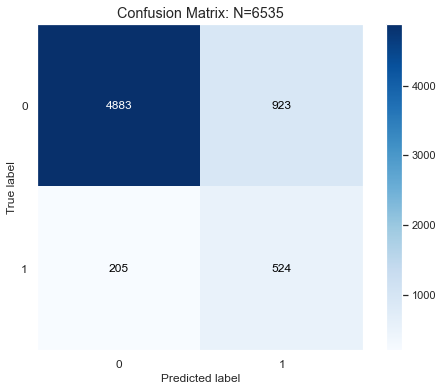

In [28]:
#  confusion matrix for logistic regression

from scikitplot.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



plot_confusion_matrix(y_val, y_pred5,
                      figsize=(8,6),
                      title=f'Confusion Matrix: N={len(y_val)}',
                      normalize=False);   




In [29]:
sns.__version__

'0.9.0'

In [30]:
matplotlib.__version__

'3.2.0'

In [32]:
# Use sklearn to calculate ROC AUC 


from sklearn.metrics import roc_auc_score

y_pred_proba = pipeline.predict_proba(X_val)[:,-1] # Probability for the last class
y_pred_proba
roc_auc_score(y_val, y_pred_proba)

0.8683914327310047

In [ ]:
import seaborn as sns


from matplotlib import pyplot as plt

y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

def set_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba > threshold

    ax = sns.distplot(y_pred_proba);
    ax.axvline(threshold, color='red');
    plt.show()

    print(classification_report(y_true, y_pred))
    print(pd.Series(y_pred).value_counts())


In [33]:
# Look under the hood for how roc_auc_score is calculated
# Calculate the separate TPR and FPR for differnet probability thresholds
# thresholds are something like = [0, .1, .2, .3, ... .9, 1]
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [34]:
pd.DataFrame({'False Positive Rate': fpr,
              'True Positive Rate': tpr,
              'Threshold': thresholds})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,2.000000
1,0.000172,0.000000,1.000000
2,0.000344,0.000000,1.000000
3,0.000344,0.002743,0.999974
4,0.000689,0.002743,0.999945
...,...,...,...
938,0.863073,0.998628,0.097677
939,0.863073,1.000000,0.097513
940,0.936962,1.000000,0.068321
941,0.937306,1.000000,0.068199


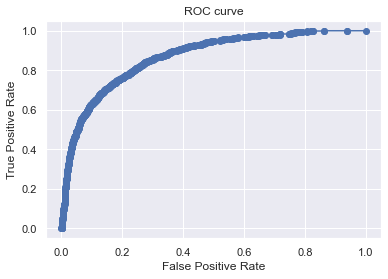

In [35]:
# See the results on a plot.
# This is the "Receiver Operating Characteristic curve"
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [36]:
X_train.shape,X_val.shape

((26137, 7), (6535, 7))

In [92]:
# prescision score in random forest using One Hot encoder
# Random forest beats baseline model

import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
 
    RandomForestClassifier(n_jobs=-1, random_state=42,class_weight='balanced')
)

# Fit on train and score on val
pipeline.fit(X_train, y_train)

# Make predictions on validation data
y_pred2 = pipeline.predict(X_val)
print(precision_score(y_val, y_pred2,average='binary'))
print(recall_score(y_val, y_pred2,average='binary'))

0.5793103448275863
0.345679012345679


In [38]:
# Classification report for Random Forest Classifier

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5806
           1       0.58      0.35      0.43       729

    accuracy                           0.90      6535
   macro avg       0.75      0.66      0.69      6535
weighted avg       0.88      0.90      0.89      6535



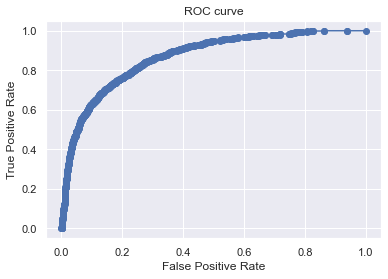

In [39]:
# See the results on a plot.
# This is the "Receiver Operating Characteristic curve" for Random Forest Classifier
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [132]:
def safe_cast(val, to_type, default=None):
    try:
        return to_type(val)
    except (ValueError, TypeError):
        return default





def predict(age, job, marital, education,duration, campaign, poutcome):
    df = pd.DataFrame(
        columns=["age", "job",  "marital","education","duration","campaign","poutcome"], 
        data=[[safe_cast(age, int), job, marital, education, safe_cast(duration, float, 0), safe_cast(campaign, float, 0), poutcome]]
    )
    
    y_pred = pipeline.predict(df)[0]
    ans = ['No', 'Yes'][y_pred]
    y_pred_proba = pipeline.predict_proba(df)[0][y_pred]
    return (f'There is {y_pred_proba*100:,.0f}% probability of getting {ans} response')

predict(25, "technician", 'single', 'tertiary',10, 2, 'success')


'There is 90% probability of getting Yes response'

In [136]:
y_pred_proba

array([0.271074  , 0.6005609 , 0.07143681, ..., 0.01188687, 0.02066696,
       0.00875822], dtype=float32)

In [45]:
list(X_val.iloc[3].values)

[31, 'technician', 'single', 'tertiary', 22.4, 7, 'unknown']

In [93]:
from joblib import dump
dump(pipeline, 'random_forest.joblib', compress=True)

['random_forest.joblib']

In [48]:
X_train.shape,X_val.shape,X_test.shape

((26137, 7), (6535, 7), (8169, 7))

In [49]:
print('X_train shape after encoding', X_train.shape)
encoder = pipeline.named_steps['onehotencoder']
encoded_df = encoder.transform(X_train)
print('X_train shape after encoding', encoded_df.shape)

X_train shape after encoding (26137, 7)
X_train shape after encoding (26137, 24)


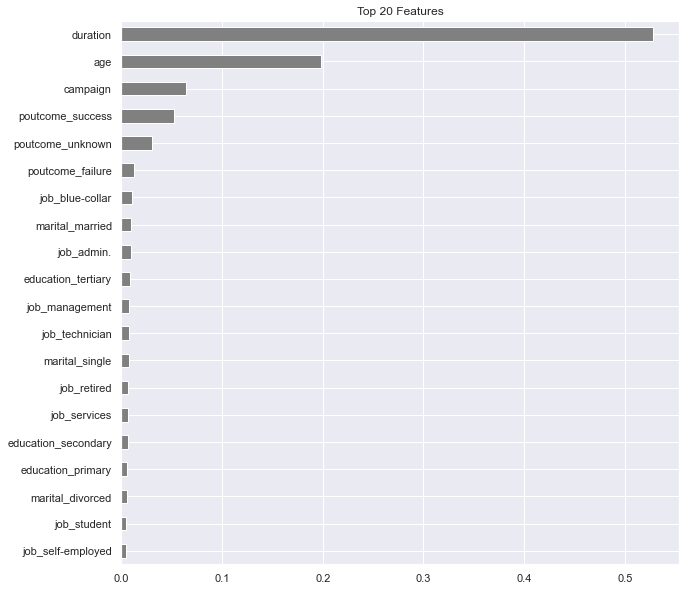

In [50]:
# feature importances through Random Forest classifier
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [51]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [52]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# Note: Decision trees do not need StandardScaler()
# Since we are splitting the data one feature at a time the scale does not matter
# i.e. If the actual range was 0 to 100 and the optimal split was 70
# If you scale from 0 to 1, the optimal split will still be 0.7



pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(min_samples_leaf=10,random_state=42,class_weight='balanced')
)

# Fit on the training set
pipeline.fit(X_train, y_train)

# precision Score on validation set

# print('Precision score for Decision tree classifier ',precision_score(y_val, y_pred,average='binary'))


# Make predictions on validation data
y_pred3 = pipeline.predict(X_val)
print(precision_score(y_val, y_pred3,average='binary'))
print(recall_score(y_val, y_pred3,average='binary'))


0.3010262257696693
0.7242798353909465


In [53]:
!pip install eli5

In [54]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [55]:

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.fit_transform(X_val) 

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [56]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [57]:
# permutation importance

import eli5
from eli5.sklearn import PermutationImportance

#1. Calculate permutation importances
permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [58]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

duration     0.039969
poutcome     0.021668
campaign     0.003336
age          0.002877
marital      0.001591
education    0.000031
job         -0.003091
dtype: float64

In [59]:
# 2. Display permutation importances (the nice way)
eli5.show_weights(
    permuter,
    top=None, #Shows all features
    feature_names=feature_names
)

Weight,Feature
0.0400 ± 0.0037,duration
0.0217 ± 0.0020,poutcome
0.0033 ± 0.0029,campaign
0.0029 ± 0.0030,age
0.0016 ± 0.0025,marital
0.0000 ± 0.0019,education
-0.0031 ± 0.0029,job


In [60]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [61]:
minimum_importance = 0 

mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask] # Subsetting with just the important features
X_train = X_train[features]

In [62]:
X_train

,age,marital,education,duration,campaign,poutcome
16533,44,married,tertiary,2.63,2,unknown
38996,62,married,secondary,1.57,5,success
26331,38,single,tertiary,5.25,1,unknown
11548,57,married,primary,3.23,1,unknown
33282,55,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...
5582,40,married,primary,7.83,2,unknown
27412,52,married,secondary,2.25,2,unknown
30812,33,single,secondary,1.73,3,failure
32546,25,single,secondary,4.70,1,unknown


In [63]:
# Random Forest Model using Ordinal encoder

X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced')
)
pipeline.fit(X_train, y_train)


# Make predictions on validation data
y_pred4 = pipeline.predict(X_val)

print(precision_score(y_val, y_pred4,average='binary'))
print(recall_score(y_val, y_pred4,average='binary'))


0.5641547861507128
0.37997256515775035


In [64]:
X_train

,age,marital,education,duration,campaign,poutcome
16533,44,married,tertiary,2.63,2,unknown
38996,62,married,secondary,1.57,5,success
26331,38,single,tertiary,5.25,1,unknown
11548,57,married,primary,3.23,1,unknown
33282,55,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...
5582,40,married,primary,7.83,2,unknown
27412,52,married,secondary,2.25,2,unknown
30812,33,single,secondary,1.73,3,failure
32546,25,single,secondary,4.70,1,unknown


In [65]:
!pip install pdpbox
!pip install plotnine

In [66]:
X.shape ,y.shape

((40841, 7), (40841,))

In [67]:
target = 'response_binary'
features = bank.columns.drop(['response_binary'])


X = bank[features]
y = bank[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [68]:
X_test.shape


(8169, 7)

In [69]:
X_train

,age,marital,education,duration,campaign,poutcome
16533,44,married,tertiary,2.63,2,unknown
38996,62,married,secondary,1.57,5,success
26331,38,single,tertiary,5.25,1,unknown
11548,57,married,primary,3.23,1,unknown
33282,55,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...
5582,40,married,primary,7.83,2,unknown
27412,52,married,secondary,2.25,2,unknown
30812,33,single,secondary,1.73,3,failure
32546,25,single,secondary,4.70,1,unknown


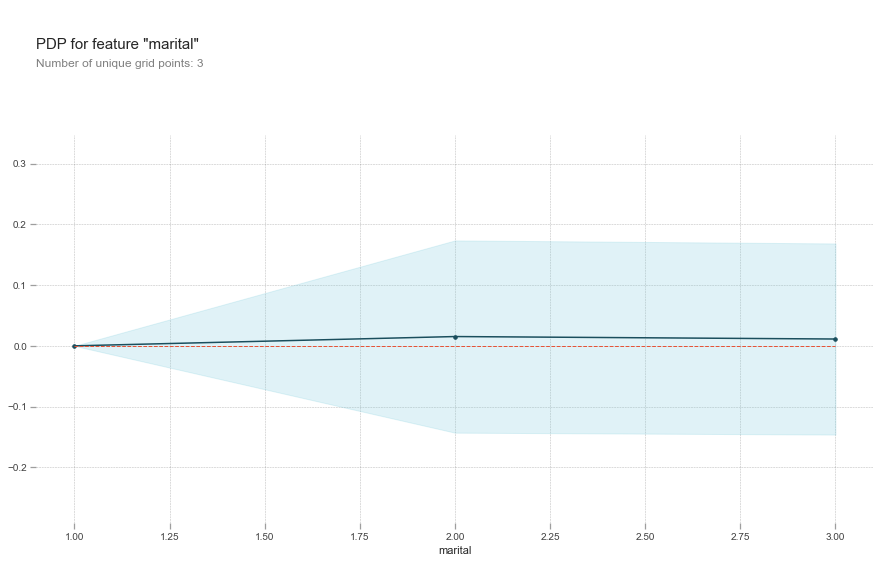

In [70]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'marital'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [71]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

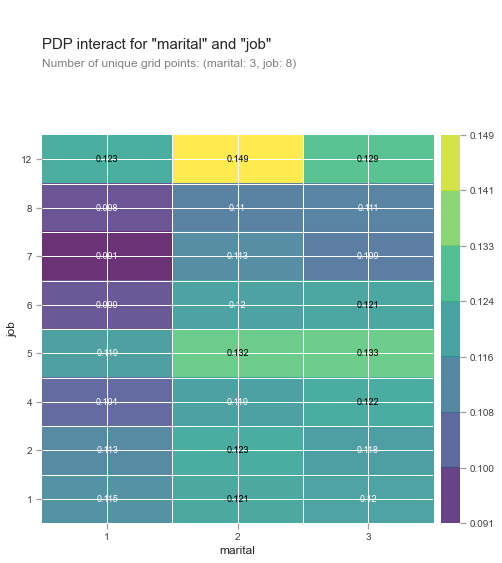

In [72]:
features = ['marital','job']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);



In [73]:
!pip install shap

In [74]:
row = X_test.iloc[[2273]]
row

,age,job,marital,education,duration,campaign,poutcome
14154,25,self-employed,single,tertiary,2.23,1,unknown


In [75]:
X_train.columns

Index(['age', 'marital', 'education', 'duration', 'campaign', 'poutcome'], dtype='object')

In [81]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)
X_test_processed = processor.transform(X_test)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.806447	validation_1-auc:0.791161
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.807078	validation_1-auc:0.791771
[2]	validation_0-auc:0.807439	validation_1-auc:0.792027
[3]	validation_0-auc:0.847063	validation_1-auc:0.828938
[4]	validation_0-auc:0.849666	validation_1-auc:0.830809
[5]	validation_0-auc:0.856103	validation_1-auc:0.842114
[6]	validation_0-auc:0.858338	validation_1-auc:0.844439
[7]	validation_0-auc:0.860124	validation_1-auc:0.846258
[8]	validation_0-auc:0.862119	validation_1-auc:0.848314
[9]	validation_0-auc:0.864249	validation_1-auc:0.847534
[10]	validation_0-auc:0.865479	validation_1-auc:0.848371
[11]	validation_0-auc:0.865647	validation_1-auc:0.84817
[12]	validation_0-auc:0.868174	validation_1-auc:0.851398
[13]	validation_0-auc:0.867855	validation_1-auc:0.851333
[14]	validation_0-auc:0.868404	validation_1-auc:0.852396

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
X_train.shape,X_test.shape, X_val.shape

((26137, 7), (8169, 7), (6535, 7))

In [83]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.8857134831211496


In [84]:
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit')  # For classification, this shows predicted probabilities

In [85]:
pip install pylift

Note: you may need to restart the kernel to use updated packages.


In [86]:
bank.head()

,Unnamed: 0,age,job,marital,education,duration,campaign,poutcome,response,response_binary
0,0,58,management,married,tertiary,4.35,1,unknown,no,0
1,1,44,technician,single,secondary,2.52,1,unknown,no,0
2,2,33,entrepreneur,married,secondary,1.27,1,unknown,no,0
3,5,35,management,married,tertiary,2.32,1,unknown,no,0
4,6,28,management,single,tertiary,3.62,1,unknown,no,0


In [87]:
df=bank.drop(['job', 'marital', 'education', 'poutcome'],axis =1)

In [ ]:
# from pylift import TransformedOutcome
# up = TransformedOutcome(df, col_treatment='campaign', col_outcome='response_binary')
# up.randomized_search(n_iter=4)
# up.fit(**up.rand_search_.best_params_)
# up.plot(plot_type='cgains', show_practical_max=True, show_no_dogs=True)